<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_7_python_estadistica_g91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df['Class'].value_counts()

,count
Class,
0.0,67264
1.0,169


In [12]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.997494
1,0.002506


In [5]:
df.shape

(67434, 31)

In [6]:
len(df)

67434

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67434 entries, 0 to 67433
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    67434 non-null  int64  
 1   V1      67434 non-null  float64
 2   V2      67434 non-null  float64
 3   V3      67434 non-null  float64
 4   V4      67434 non-null  float64
 5   V5      67434 non-null  float64
 6   V6      67434 non-null  float64
 7   V7      67434 non-null  float64
 8   V8      67434 non-null  float64
 9   V9      67434 non-null  float64
 10  V10     67434 non-null  float64
 11  V11     67434 non-null  float64
 12  V12     67434 non-null  float64
 13  V13     67434 non-null  float64
 14  V14     67434 non-null  float64
 15  V15     67434 non-null  float64
 16  V16     67434 non-null  float64
 17  V17     67434 non-null  float64
 18  V18     67434 non-null  float64
 19  V19     67434 non-null  float64
 20  V20     67434 non-null  float64
 21  V21     67433 non-null  float64
 22

In [9]:
df = df.dropna()

In [10]:
df['Class'] = df['Class'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67433 entries, 0 to 67432
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    67433 non-null  int64  
 1   V1      67433 non-null  float64
 2   V2      67433 non-null  float64
 3   V3      67433 non-null  float64
 4   V4      67433 non-null  float64
 5   V5      67433 non-null  float64
 6   V6      67433 non-null  float64
 7   V7      67433 non-null  float64
 8   V8      67433 non-null  float64
 9   V9      67433 non-null  float64
 10  V10     67433 non-null  float64
 11  V11     67433 non-null  float64
 12  V12     67433 non-null  float64
 13  V13     67433 non-null  float64
 14  V14     67433 non-null  float64
 15  V15     67433 non-null  float64
 16  V16     67433 non-null  float64
 17  V17     67433 non-null  float64
 18  V18     67433 non-null  float64
 19  V19     67433 non-null  float64
 20  V20     67433 non-null  float64
 21  V21     67433 non-null  float64
 22  V22

In [11]:
df['Time'].value_counts()

,count
Time,
3767,21
3770,20
3750,19
19912,19
3749,17
...,...
20466,1
41380,1
20460,1


In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,...,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000
mean,33976.699643,-0.241643,-0.018326,0.683468,0.169466,-0.268579,0.101769,-0.114430,0.057625,0.030095,...,-0.028557,-0.106489,-0.038823,0.005627,0.136606,0.020725,0.002811,0.003520,96.628136,0.002506
std,14221.927028,1.857619,1.649738,1.418367,1.377288,1.385186,1.305239,1.251283,1.230091,1.167020,...,0.738014,0.639314,0.608941,0.596550,0.439152,0.497668,0.382484,0.322323,269.895189,0.049999
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,28238.000000,-1.001813,-0.590076,0.195612,-0.724687,-0.887483,-0.636487,-0.604417,-0.141816,-0.666525,...,-0.226694,-0.526921,-0.179448,-0.325986,-0.127251,-0.329217,-0.062635,-0.005865,7.680000,0.000000
50%,37354.000000,-0.241593,0.072585,0.772166,0.188202,-0.301396,-0.149766,-0.074160,0.066102,-0.063083,...,-0.061471,-0.081004,-0.051721,0.061460,0.174488,-0.075903,0.009512,0.022750,26.310000,0.000000
75%,44551.000000,1.153768,0.728143,1.405302,1.053099,0.269649,0.495032,0.420855,0.343558,0.688097,...,0.115486,0.309548,0.078955,0.403106,0.422752,0.297957,0.082538,0.075882,88.500000,0.000000
max,52532.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [15]:

### definir X(dependientes) y Y(independiente, solo una y binaria)
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
### vamos a generar un dataset de train y de test

from sklearn.model_selection import train_test_split ## mantiene la distribución de clases y genera conjuntos de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


53946
53946
13487
13487


In [18]:
y_test

,Class
43062,0
60365,0
60883,0
15272,0
19200,0
...,...
5965,0
46426,0
19038,0
32443,0


In [20]:
y_train.value_counts()

,count
Class,
0,53819
1,127


In [19]:
y_test.value_counts()

,count
Class,
0,13445
1,42


In [23]:
len(X_train), len(y_train)

(53946, 53946)

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)

len(X_resampled_train), len(y_resampled_train)

(107638, 107638)

In [27]:
X_resampled_test, y_resampled_test = smote.fit_resample(X_test, y_test)

In [24]:
y_resampled_train.value_counts()

,count
Class,
0,53819
1,53819


In [25]:
X_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2082,1607,-0.759709,1.838466,-0.603569,0.909875,-0.122696,-0.757569,0.282951,0.699440,-0.760059,...,-0.044829,0.220673,0.725214,0.162037,0.099282,-0.665606,-0.377858,0.319315,0.161367,12.17
55289,46862,1.135145,-0.022437,-0.177114,1.003903,-0.056884,-0.485540,0.232061,-0.132219,0.216119,...,-0.019133,0.010680,-0.174252,-0.264293,-0.472324,0.726193,-0.281484,-0.011767,0.024299,91.00
38181,39283,-3.062330,-2.377922,0.487651,-1.226624,-4.258796,1.155048,3.532968,0.384194,0.616543,...,2.259888,0.883112,0.647797,2.235279,0.388965,1.074857,-0.659756,-0.168465,0.142272,1110.72
17637,28834,1.207926,-0.789070,0.529527,-0.534195,-1.009504,-0.124948,-0.674119,0.097185,-0.714928,...,0.103788,0.097129,0.266258,-0.028447,0.264066,0.408954,-0.249524,0.017974,0.009327,54.00
39398,39818,-0.500316,0.262250,1.839642,1.344533,0.599702,1.615684,0.126898,0.184491,0.855461,...,0.098093,-0.424449,-0.606653,-0.185719,-1.308892,-0.226765,-0.392093,-0.067014,-0.045864,30.46


In [28]:
### falta escalar la data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_resampled_train = sc.fit_transform(X_resampled_train)
X_resampled_test = sc.fit_transform(X_resampled_test)

In [30]:
X_train

array([[-2.27411211e+00, -2.79844669e-01,  1.13702838e+00, ...,
         8.22469165e-01,  5.32973593e-01, -3.12748012e-01],
       [ 9.08050519e-01,  7.49984461e-01, -1.95757252e-03, ...,
        -3.93482414e-02,  7.57195233e-02, -2.36408293e-02],
       [ 3.75123537e-01, -1.53128980e+00, -1.44365759e+00, ...,
        -4.47236496e-01,  4.69271809e-01,  3.71615844e+00],
       ...,
       [ 3.48403356e-01, -1.26020493e-01,  5.89361019e-01, ...,
         6.57736167e-01,  3.67384319e-01, -3.32295663e-01],
       [ 7.43158874e-01,  7.67757102e-01,  1.33629389e-01, ...,
         1.23112350e-01,  9.60223786e-02, -3.39043820e-01],
       [-2.26897902e+00,  6.70600729e-01, -4.43178181e-01, ...,
         7.70866875e-02,  7.30788607e-02,  9.72758752e-02]])

In [31]:

## sin smote ##

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
modelo = LogisticRegression(random_state=16)

# fit the model with data
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

In [33]:
# Imprimir las métricas de desempeño
print("Métricas de Desempeño:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR:", average_precision)

Métricas de Desempeño:
Accuracy: 0.9983687995847853
Precision: 0.7631578947368421
Recall: 0.6904761904761905
F1 Score: 0.725
AUC-ROC: 0.8449033983247445
AUC-PR: 0.5279062470441694


Text(0.5, 23.52222222222222, 'Predicted label')

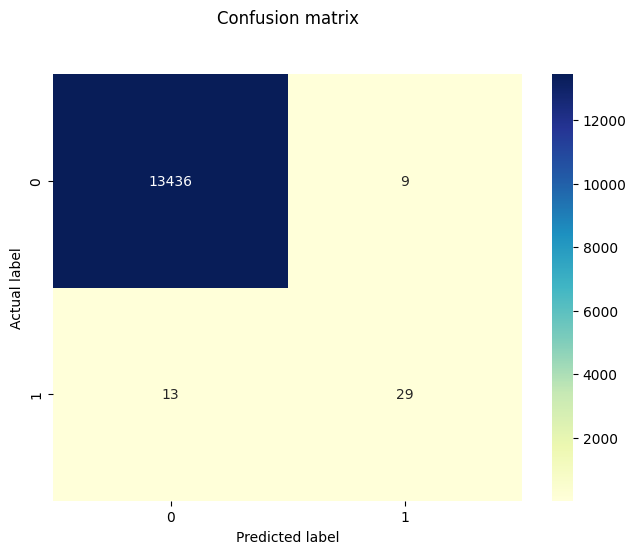

In [34]:

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
# instantiate the model (using the default parameters)
modelo = LogisticRegression(random_state=16)

# fit the model with data
modelo.fit(X_resampled_train, y_resampled_train)

y_pred_r = modelo.predict(X_resampled_test)
# Calcular métricas de desempeño
accuracy = accuracy_score(y_resampled_test, y_pred_r)
precision = precision_score(y_resampled_test, y_pred_r)
recall = recall_score(y_resampled_test, y_pred_r)
f1 = f1_score(y_resampled_test, y_pred_r)
roc_auc = roc_auc_score(y_resampled_test, y_pred_r)
average_precision = average_precision_score(y_resampled_test, y_pred_r)
# Imprimir las métricas de desempeño
print("Métricas de Desempeño:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR:", average_precision)

Métricas de Desempeño:
Accuracy: 0.9600223131275567
Precision: 0.9930644132653061
Recall: 0.92651543324656
F1 Score: 0.9586363461464465
AUC-ROC: 0.9600223131275567
AUC-PR: 0.956831788474966


Text(0.5, 23.52222222222222, 'Predicted label')

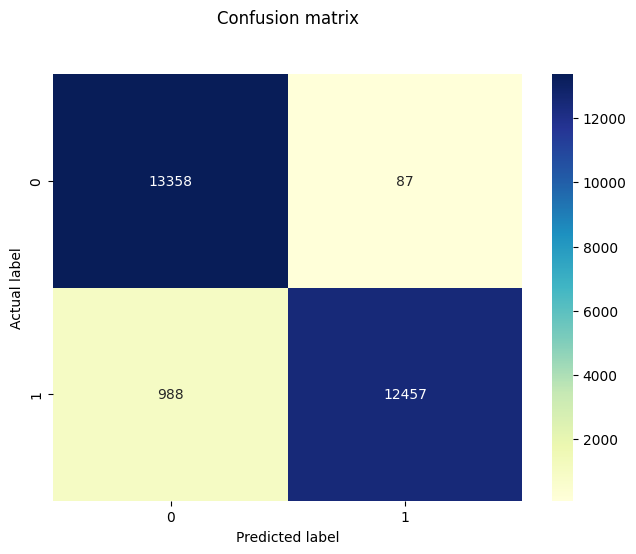

In [38]:
cnf_matrix = metrics.confusion_matrix(y_resampled_test, y_pred_r)


import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
data = pd.read_csv('cardio.csv')
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [41]:
##1
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


In [42]:
data['diabetes'].value_counts()

,count
diabetes,
0,3557
1,99


In [43]:
## 2
columna = ['education','age','totChol']
data[columna].describe()

,education,age,totChol
count,3656.000000,3656.000000,3656.000000
mean,1.979759,49.557440,236.873085
std,1.022657,8.561133,44.096223
min,1.000000,32.000000,113.000000
25%,1.000000,42.000000,206.000000
50%,2.000000,49.000000,234.000000
75%,3.000000,56.000000,263.250000
max,4.000000,70.000000,600.000000


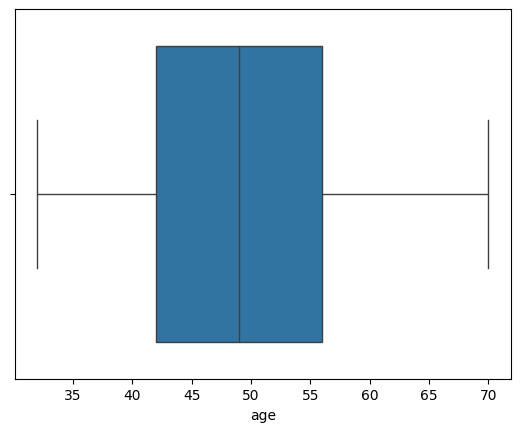

In [44]:
### BOXPLOT, PAIRPLOT, SCATERPLOT, HISTOGRAMA, HEATMAP
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=data['age'])
plt.show()

In [ ]:
## 3 aplicar solo a las columnas numericas
Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar las filas con valores atípicos en la columna actual
filas_atipicas = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


In [ ]:
## 4
sns.heatmap(data[columnas_numericas], annot=True, cmap='coolwarm', linewidths=.5) ## remplazar columnas_numericas

# Añade título al mapa de calor
plt.title('Mapa de Correlación')

# Muestra el mapa de calor
plt.show()


In [45]:
## 5
cuartil = data['BMI'].quantile(0.75)
cuartil
numerador=(condicion 1 & condicion 2)
denominador = cuantos son sobre cuartil
prob = numerador/denominador

28.04

In [ ]:
y = df["TenYearCHD"].values

In [ ]:
# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelo de Regresión Logística con SMOTE
logistic_regression_model_smote = LogisticRegression(random_state=42)
logistic_regression_model_smote.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos con SMOTE
y_pred_smote = logistic_regression_model_smote.predict(X)